# EDA Plots for Delphes (fastsim) and Geant4 (fullsim)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import os
import pathlib
from tqdm import tqdm

In [2]:
# delphes
# [p for p in delphes_path.glob("*.h5")]
delphes_path = pathlib.Path("/global/cfs/projectdirs/m3246/mingfong/transfer-learning/delphes_train_set/train_0.h5")   # fastsim original
# fullsim
fullsim_path = pathlib.Path("/global/cfs/projectdirs/m3246/mingfong/transfer-learning/train.h5")   # fullsim original
with h5py.File(delphes_path, "r") as delphes_f, h5py.File(fullsim_path, "r") as fullsim_f:
  print("delphes num_samples =", len(delphes_f["labels"]))
  print("fullsim num_samples =", len(fullsim_f["labels"]))

delphes num_samples = 5000000
fullsim num_samples = 42233012


In [3]:
with h5py.File(delphes_path, "r") as delphes_f, h5py.File(fullsim_path, "r") as fullsim_f:
  print("delphes num_samples =", len(delphes_f["labels"]))
  print("fullsim num_samples =", len(fullsim_f["labels"]))
  for key in ['fjet_clus_E', 'fjet_clus_eta', 'fjet_clus_phi', 'fjet_clus_pt', 'fjet_eta', 'fjet_m', 'fjet_phi', 'fjet_pt']:
    print(key, delphes_f[key].shape, fullsim_f[key].shape)

delphes num_samples = 5000000
fullsim num_samples = 42233012
fjet_clus_E (5000000, 200) (42233012, 200)
fjet_clus_eta (5000000, 200) (42233012, 200)
fjet_clus_phi (5000000, 200) (42233012, 200)
fjet_clus_pt (5000000, 200) (42233012, 200)
fjet_eta (5000000,) (42233012,)
fjet_m (5000000,) (42233012,)
fjet_phi (5000000,) (42233012,)
fjet_pt (5000000,) (42233012,)


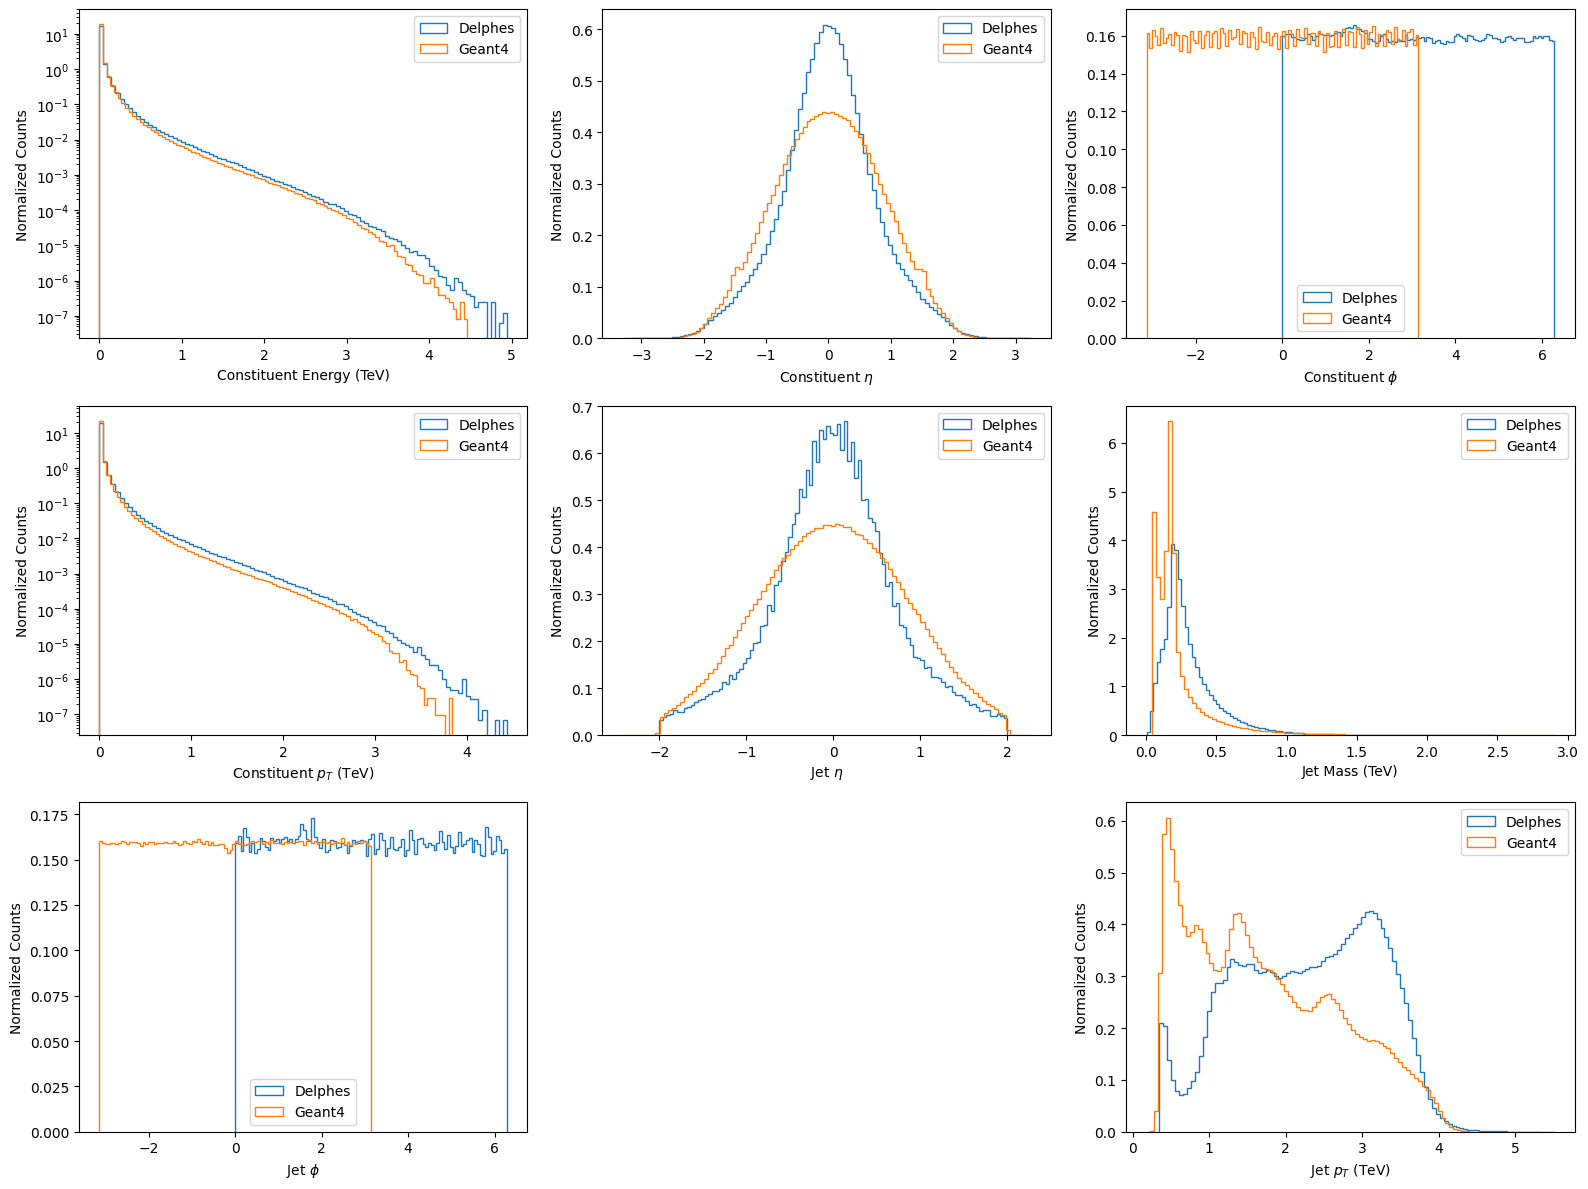

In [5]:
# TODO put axis labels and units
# TODO better naming for titles

NUM_SAMPLES = 5000000    # number of samples to plot (order shouldn't matter)
# NUM_SAMPLES = 10000    # number of samples to plot (order shouldn't matter)
EPS = 1e-12
num_bins = 100
keys = ['fjet_clus_E', 'fjet_clus_eta', 'fjet_clus_phi', 'fjet_clus_pt', 'fjet_eta', 'fjet_m', 'fjet_phi', 'fjet_pt']
delphes_sample_data = {key: [] for key in keys}
fullsim_sample_data = {key: [] for key in keys}

key_to_xlabel = {       # nicer looking names for x axis
    "fjet_clus_E": "Constituent Energy (TeV)",
    "fjet_clus_eta": "Constituent $\eta$",
    "fjet_clus_phi": "Constituent $\phi$",
    "fjet_clus_pt": "Constituent $p_T$ (TeV)",
    "fjet_eta": "Jet $\eta$",
    "fjet_m": "Jet Mass (TeV)",
    "fjet_phi": "Jet $\phi$",
    "fjet_pt": "Jet $p_T$ (TeV)",
}

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

with h5py.File(delphes_path, "r") as delphes_f, h5py.File(fullsim_path, "r") as fullsim_f:
    for i, key in enumerate(keys):
        if i == 7:
            i += 1
        if any([x in key for x in ["_E", "_pt", "_m"]]):        # convert from MeV to TeV
            delphes_sample_data[key] = delphes_f[key][:NUM_SAMPLES].flatten() / 1e6
            fullsim_sample_data[key] = fullsim_f[key][:NUM_SAMPLES].flatten() / 1e6
        else:
            delphes_sample_data[key] = delphes_f[key][:NUM_SAMPLES].flatten()
            fullsim_sample_data[key] = fullsim_f[key][:NUM_SAMPLES].flatten()
        
        # plot nonzero values for clus
        if "clus" in key:
            mask1 = fullsim_sample_data[key] < -EPS
            mask2 = fullsim_sample_data[key] > EPS
            axes[i].hist(delphes_sample_data[key][delphes_sample_data[key] != 0], bins=num_bins, alpha=1, label="Delphes", histtype="step", density=True)
            axes[i].hist(fullsim_sample_data[key][np.logical_or(mask1, mask2)], bins=num_bins, alpha=1, label="Geant4", histtype="step", density=True)
            
        else:
            axes[i].hist(delphes_sample_data[key], bins=num_bins, alpha=1, label="Delphes", histtype="step", density=True)
            axes[i].hist(fullsim_sample_data[key], bins=num_bins, alpha=1, label="Geant4", histtype="step", density=True)
        if key in ["fjet_clus_E", "fjet_clus_pt"]:
            axes[i].set_yscale("log")
        axes[i].set_xlabel(key_to_xlabel[key])
        axes[i].set_ylabel("Normalized Counts")
        # axes[i].set_title(key)
        axes[i].legend()
        # plt.show()
axes[7].axis("off")
plt.tight_layout()
plt.show()

In [6]:
# sparsity check (non zero entries)

nonzero_dict = {
    "key": keys,
    "delphes": [],
    "fullsim": [],
}
print("Nonzero entries")
with h5py.File(delphes_path, "r") as delphes_f, h5py.File(fullsim_path, "r") as fullsim_f:
    for key in keys:
        delphes_nonzero = np.count_nonzero(delphes_sample_data[key]) / len(delphes_sample_data[key])
        fullsim_nonzero = np.count_nonzero(fullsim_sample_data[key]) / len(fullsim_sample_data[key])
        print(f"{key}: Delphes={delphes_nonzero}, Fullsim={fullsim_nonzero}")
        nonzero_dict["delphes"].append(delphes_nonzero)
        nonzero_dict["fullsim"].append(fullsim_nonzero)
nonzero_df = pd.DataFrame(nonzero_dict)

Nonzero entries
fjet_clus_E: Delphes=0.3318585, Fullsim=0.27934
fjet_clus_eta: Delphes=0.3318375, Fullsim=0.27934
fjet_clus_phi: Delphes=0.331854, Fullsim=0.27934
fjet_clus_pt: Delphes=0.3318585, Fullsim=0.27934
fjet_eta: Delphes=1.0, Fullsim=1.0
fjet_m: Delphes=1.0, Fullsim=1.0
fjet_phi: Delphes=1.0, Fullsim=1.0
fjet_pt: Delphes=1.0, Fullsim=1.0


In [7]:
print("Proportion of nonzero entries")
nonzero_df

Proportion of nonzero entries


,key,delphes,fullsim
0,fjet_clus_E,0.331859,0.27934
1,fjet_clus_eta,0.331838,0.27934
2,fjet_clus_phi,0.331854,0.27934
3,fjet_clus_pt,0.331859,0.27934
4,fjet_eta,1.000000,1.00000
5,fjet_m,1.000000,1.00000
6,fjet_phi,1.000000,1.00000
7,fjet_pt,1.000000,1.00000


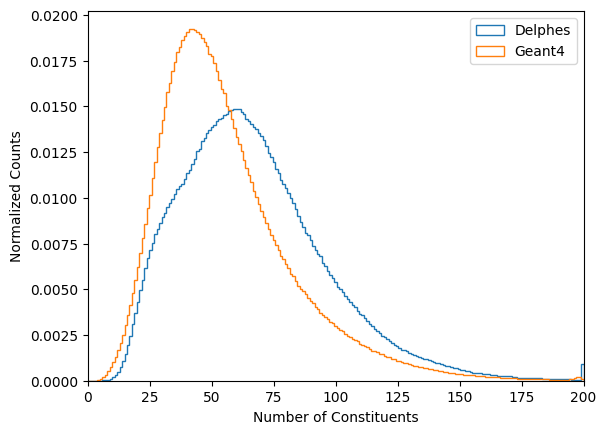

In [21]:
# histrogram of number of constituents per event
with h5py.File(delphes_path, "r") as delphes_f, h5py.File(fullsim_path, "r") as fullsim_f:
  delphes_nonzero_count = np.sum(np.logical_not(np.isclose(delphes_f["fjet_clus_E"][:5000000], 0, atol=EPS)), axis=1)
  fullsim_nonzero_count = np.sum(np.logical_not(np.isclose(fullsim_f["fjet_clus_E"][:5000000], 0, atol=EPS)), axis=1)

plt.hist(delphes_nonzero_count, bins=201, alpha=1, label="Delphes", histtype="step", density=True, range=(0,200))
plt.hist(fullsim_nonzero_count, bins=201, alpha=1, label="Geant4", histtype="step", density=True, range=(0,200))
plt.xlim(0, 200)
plt.xlabel("Number of Constituents")
plt.ylabel("Normalized Counts")
plt.legend()
plt.show()

In [16]:
delphes_nonzero_count

array([ 99, 142, 149, ...,  86,  77, 151])

In [13]:
np.unique(delphes_nonzero_count, return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

delphes num_samples = 5000000
fullsim num_samples = 42233012
delphes data shape = <HDF5 dataset "data": shape (5000000, 200, 7), type "<f4">
fullsim data shape = <HDF5 dataset "data": shape (42233012, 200, 7), type "<f4">


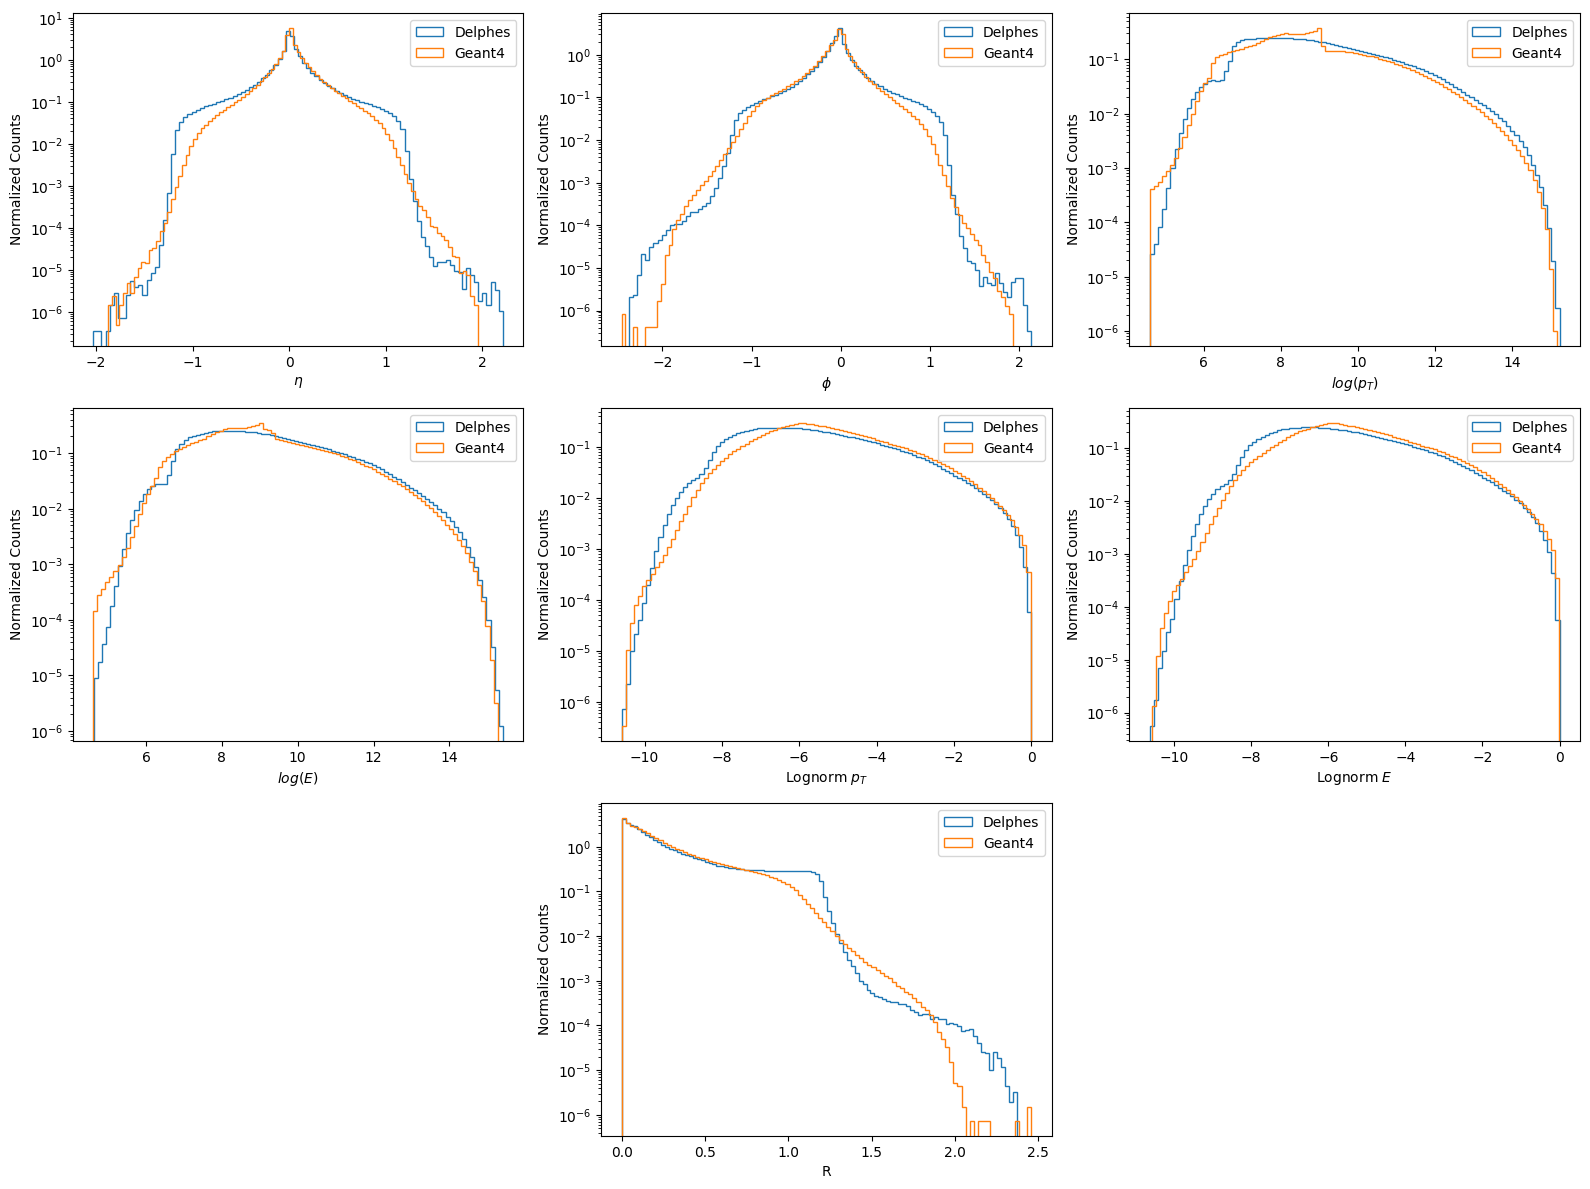

In [ ]:
# read preprocessed data
# make histograms for preprocessed data
PROCESSED_COL_NAMES = [
  "$\eta$",
  "$\phi$",
  "$log(p_T)$",
  "$log(E)$",
  "Lognorm $p_T$",
  "Lognorm $E$",
  "R",
]
delphes_processed_path = pathlib.Path("/pscratch/sd/m/mingfong/transfer-learning/delphes_train_processed/preprocessed_train_0.h5")   # fastsim preprocessed
fullsim_processed_path = pathlib.Path("/pscratch/sd/m/mingfong/transfer-learning/fullsim_train_processed/preprocessed_train.h5")   # fastsim preprocessed

processed_delphes_sample_data = {key: [] for key in PROCESSED_COL_NAMES}
processed_fullsim_sample_data = {key: [] for key in PROCESSED_COL_NAMES}

NUM_SAMPLES = 1000000    # number of samples to plot (order shouldn't matter)
# NUM_SAMPLES = 10000    # number of samples to plot (order shouldn't matter)
EPS = 1e-12
num_bins = 100

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

with h5py.File(delphes_processed_path, "r") as delphes_f, h5py.File(fullsim_processed_path, "r") as fullsim_f:
  print("delphes num_samples =", len(delphes_f["labels"]))
  print("fullsim num_samples =", len(fullsim_f["labels"]))
  print("delphes data shape =", delphes_f["data"])
  print("fullsim data shape =", fullsim_f["data"])
  for i, key in enumerate(PROCESSED_COL_NAMES):
    if i == 6:
      i += 1
    
    # # plot nonzero values for clus
    # if "clus" in key:
    #   mask1 = processed_fullsim_sample_data[key] < -EPS
    #   mask2 = processed_fullsim_sample_data[key] > EPS
    #   axes[i].hist(processed_delphes_sample_data[key][processed_delphes_sample_data[key] != 0], bins=num_bins, alpha=1, label="Delphes", histtype="step", density=True)
    #   axes[i].hist(processed_fullsim_sample_data[key][np.logical_or(mask1, mask2)], bins=num_bins, alpha=1, label="Geant4", histtype="step", density=True)
      
    # else:
    #   axes[i].hist(processed_delphes_sample_data[key], bins=num_bins, alpha=1, label="Delphes", histtype="step", density=True)
    #   axes[i].hist(processed_fullsim_sample_data[key], bins=num_bins, alpha=1, label="Geant4", histtype="step", density=True)
    # if key in ["fjet_clus_E", "fjet_clus_pt"]:
    #   axes[i].set_yscale("log")
    # axes[i].set_xlabel(key_to_xlabel[key])
    # axes[i].set_ylabel("Normalized Counts")
    # axes[i].legend()
    processed_delphes_sample_data[key] = delphes_f["data"][:NUM_SAMPLES, :, PROCESSED_COL_NAMES.index(key)].flatten()
    processed_fullsim_sample_data[key] = fullsim_f["data"][:NUM_SAMPLES, :, PROCESSED_COL_NAMES.index(key)].flatten()
    
    mask1 = processed_fullsim_sample_data[key] < -EPS
    mask2 = processed_fullsim_sample_data[key] > EPS
    axes[i].hist(processed_delphes_sample_data[key][processed_delphes_sample_data[key] != 0], bins=num_bins, alpha=1, label="Delphes", histtype="step", density=True)
    axes[i].hist(processed_fullsim_sample_data[key][np.logical_or(mask1, mask2)], bins=num_bins, alpha=1, label="Geant4", histtype="step", density=True)
    axes[i].set_xlabel(key)
    axes[i].set_ylabel("Normalized Counts")
    axes[i].legend()
    axes[i].set_yscale("log")

axes[6].axis("off")
axes[8].axis("off")
plt.tight_layout()